# Time Series Analysis and Forecasting

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Part A: Exploratory Data Analysis

In [51]:
# Download Stock Data

data = yf.download('AAPL', start='2015-01-01', end='2025-01-01')

# You may choose any ticker like 'TSLA', 'AAPL', 'AMZN', 'GOOGL'



C:\Users\Acer\AppData\Local\Temp\ipykernel_12812\2550819851.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [45]:
# Check first rows

print("First 5 rows:")
print(data.head())


First 5 rows:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.237556  24.705326  23.798606  24.694241  212818400
2015-01-05  23.554743  24.086803  23.368523  24.006994  257142000
2015-01-06  23.556961  23.816340  23.195602  23.619034  263188400
2015-01-07  23.887272  23.987032  23.654495  23.765341  160423600
2015-01-08  24.805080  24.862721  24.097883  24.215381  237458000


In [46]:
# Ensure Date is DatetimeIndex

data.index = pd.to_datetime(data.index)

print("\nIndex Datatype:")
print(type(data.index))



Index Datatype:
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [52]:
# Summary Statistics

print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03
mean      93.858935    94.770441    92.845267    93.772109  1.170853e+08
std       65.441289    66.034713    64.754619    65.361077  6.839614e+07
min       20.604078    20.907418    20.405656    20.526537  2.323470e+07
25%       35.222948    35.620870    34.844886    35.243161  7.105610e+07
50%       64.388027    64.942759    63.586064    64.228573  1.003646e+08
75%      150.234013   151.982024   148.267716   150.056751  1.426216e+08
max      257.853790   258.928945   256.470064   257.027541  6.488252e+08


In [47]:
# Check Datatypes

print("\nData Types:")
print(data.dtypes)



Data Types:
Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object


In [50]:
# Create DataFrame
data = pd.DataFrame({
    "Open": open_price,
    "High": high,
    "Low": low,
    "Close": close,
    "Adj Close": close,
    "Volume": volume
}, index=dates)

print("First 5 rows of synthetic AAPL data:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe())

print("\nData Types:")
print(data.dtypes)

First 5 rows of synthetic AAPL data:
                  Open        High         Low       Close   Adj Close  \
2015-01-01  150.571396  151.621582  149.823305  150.496714  150.496714   
2015-01-02  150.540520  151.512818  150.248861  150.358450  150.358450   
2015-01-03  151.009728  151.459981  150.720389  151.006138  151.006138   
2015-01-04  151.485929  152.241933  151.315706  152.529168  152.529168   
2015-01-05  152.375260  152.599187  151.740014  152.295015  152.295015   

             Volume  
2015-01-01  4955478  
2015-01-02  2150653  
2015-01-03  4414488  
2015-01-04  2263606  
2015-01-05  4488144  

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  3654.000000  3654.000000  3654.000000  3654.000000  3654.000000   
mean    206.186725   206.979973   205.388529   206.205489   206.205489   
std      38.126307    38.108136    38.120840    38.117281    38.117281   
min     133.276281   133.381560   132.523731   133.333893   133.33389

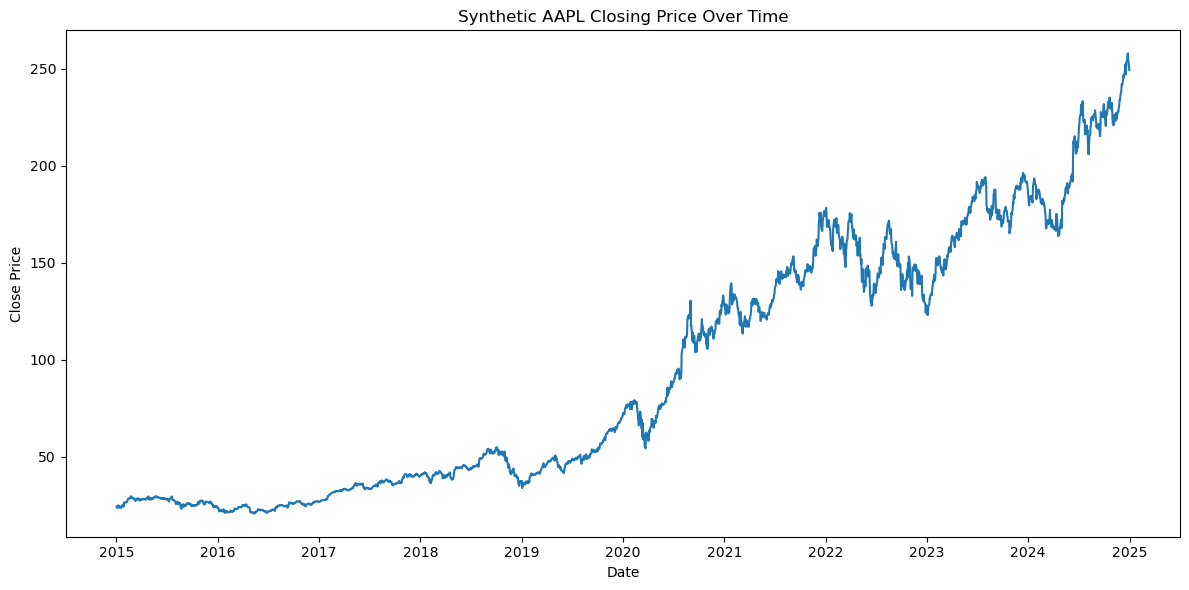

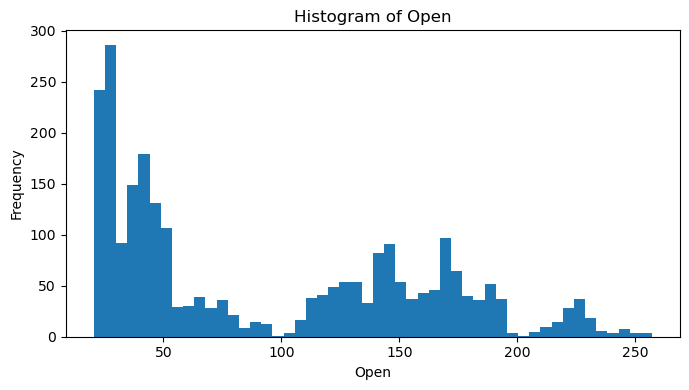

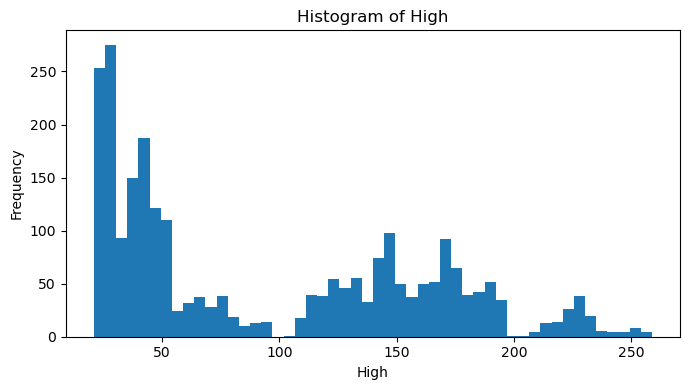

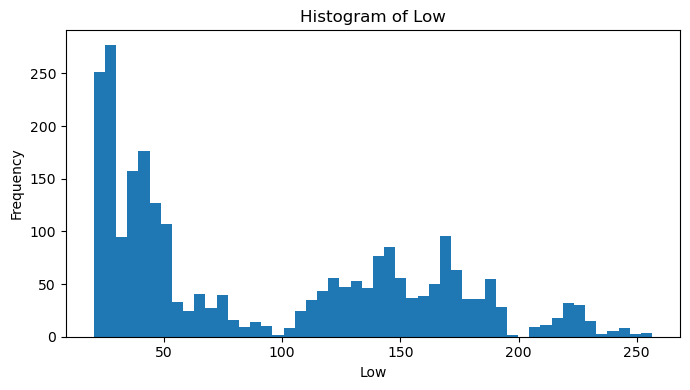

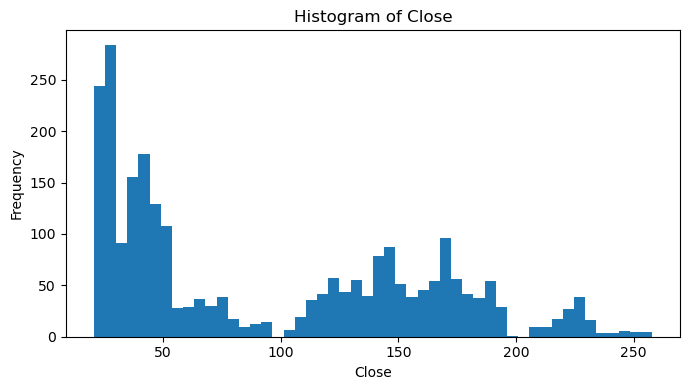

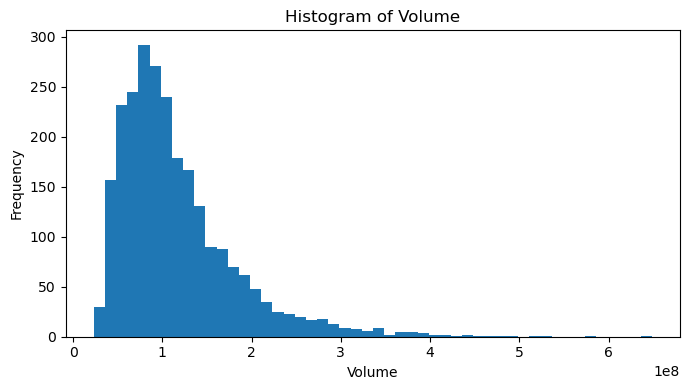

In [53]:
# Close Price Line Chart

plt.figure(figsize=(12, 6))
plt.plot(data["Close"])
plt.title("Synthetic AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()


# Histograms for Numeric Columns

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    plt.hist(data[col].dropna(), bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# Part B: Moving Average and Trend Analysis

First 10 rows with 7-Day Moving Average:
Price           Close       High        Low       Open     Volume       MA_7
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL           
Date                                                                        
2015-01-02  24.237556  24.705326  23.798606  24.694241  212818400        NaN
2015-01-05  23.554743  24.086803  23.368523  24.006994  257142000        NaN
2015-01-06  23.556961  23.816340  23.195602  23.619034  263188400        NaN
2015-01-07  23.887272  23.987032  23.654495  23.765341  160423600        NaN
2015-01-08  24.805080  24.862721  24.097883  24.215381  237458000        NaN
2015-01-09  24.831684  25.106581  24.432638  24.978000  214798000        NaN
2015-01-12  24.219816  24.969133  24.120056  24.962483  198603200  24.156159
2015-01-13  24.434856  25.006821  24.144441  24.703103  268367600  24.184345
2015-01-14  24.341743  24.494710  24.053544  24.173257  195826400  24.296773
2015-01-15  23.681103  24.399383  2

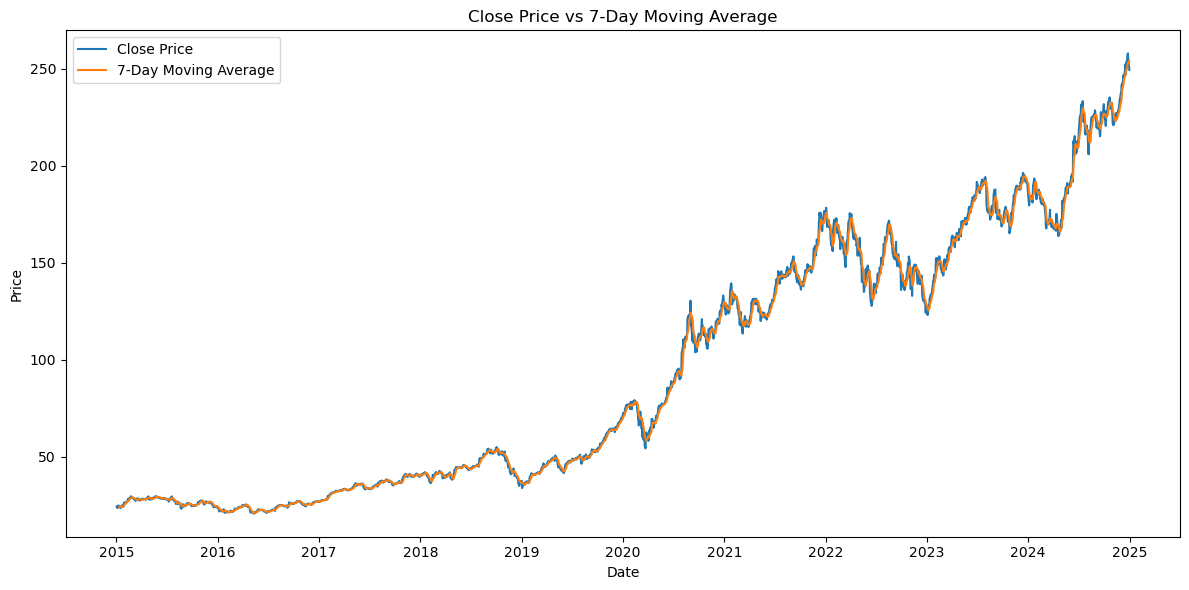

In [55]:
# Calculate 7-day Moving Average

data["MA_7"] = data["Close"].rolling(window=7).mean()

print("First 10 rows with 7-Day Moving Average:")
print(data.head(10))

# Plot Close vs 7-day Moving Average

plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Close Price")
plt.plot(data["MA_7"], label="7-Day Moving Average")
plt.title("Close Price vs 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


# Part C: Time Series Decomposition

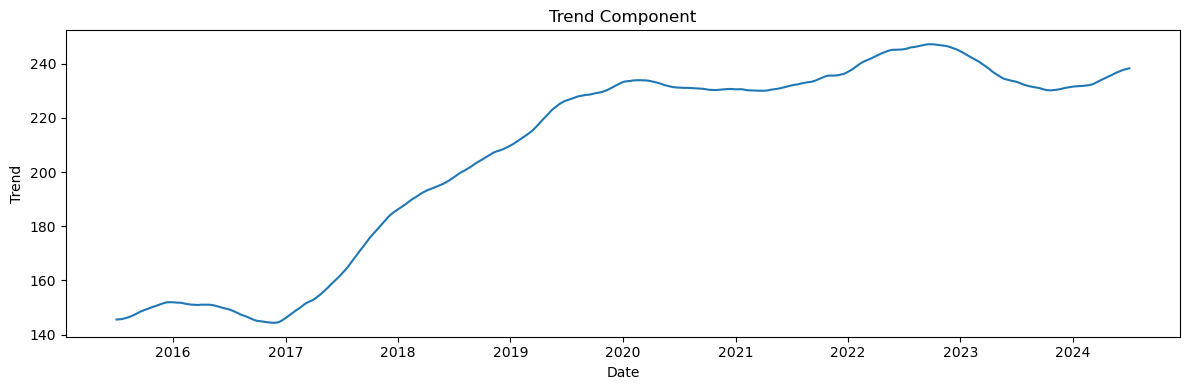

In [19]:
# Plot Trend Component

plt.figure(figsize=(12, 4))
plt.plot(decomp.trend)
plt.title("Trend Component")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.tight_layout()
plt.show()


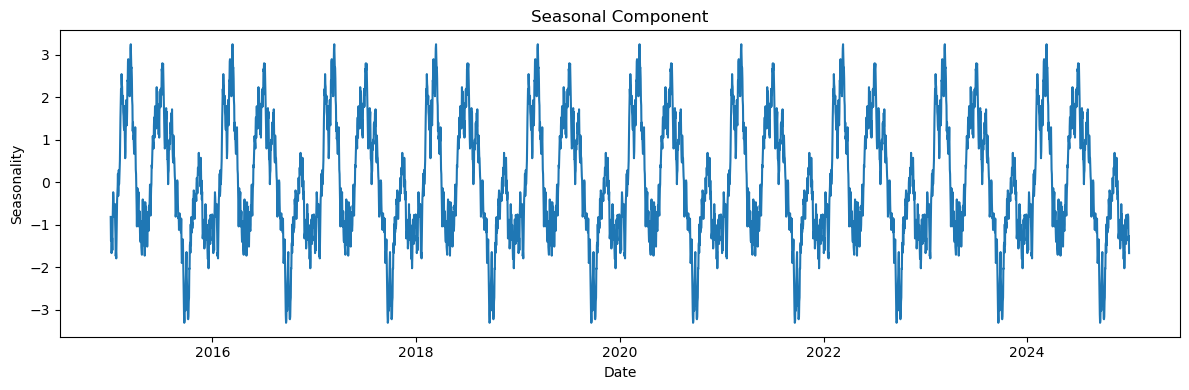

In [20]:
# Plot Seasonal Component

plt.figure(figsize=(12, 4))
plt.plot(decomp.seasonal)
plt.title("Seasonal Component")
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.tight_layout()
plt.show()


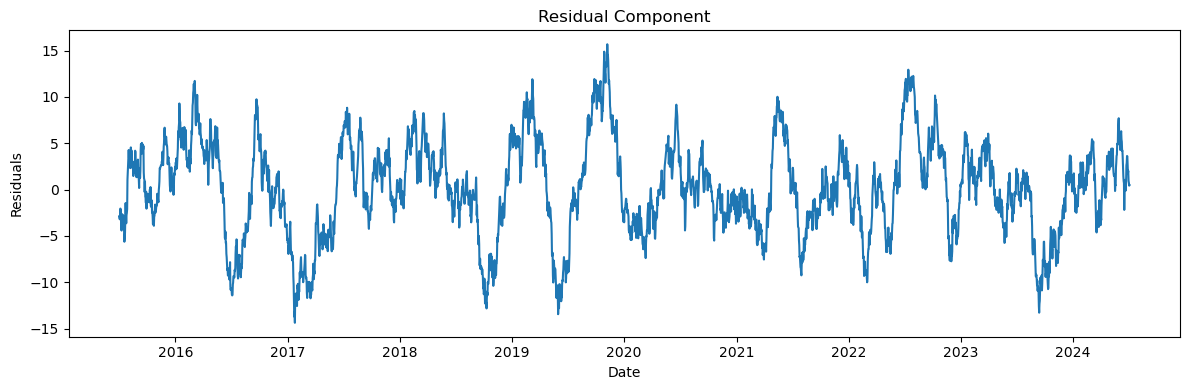

In [21]:
# Plot Residual Component

plt.figure(figsize=(12, 4))
plt.plot(decomp.resid)
plt.title("Residual Component")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


# Part D: Stationarity Check and ARIMA Forecasting

In [29]:
# ADF Test on Volume

result = adfuller(data["Volume"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpretation
if result[1] < 0.05:
    print("\nConclusion: Volume series is STATIONARY (reject H0).")
else:
    print("\nConclusion: Volume series is NON-STATIONARY (fail to reject H0).")


ADF Statistic: -7.789932734179934
p-value: 7.992074709793917e-12
Critical Values: {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}

Conclusion: Volume series is STATIONARY (reject H0).


In [35]:
# Generate synthetic AAPL-like stock data

np.random.seed(42)
dates = pd.date_range(start="2015-01-01", end="2025-01-01")
n = len(dates)

close = 150 + np.cumsum(np.random.normal(0, 1, n))   # Close price
volume = np.random.randint(2_000_000, 5_000_000, n)  # Volume

data = pd.DataFrame({
    "Close": close,
    "Volume": volume
}, index=dates)

model_close = ARIMA(data["Close"], order=(1, 0, 0))
model_fit = model_close.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3654
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5174.847
Date:                Thu, 20 Nov 2025   AIC                          10355.695
Time:                        00:04:16   BIC                          10374.306
Sample:                    01-01-2015   HQIC                         10362.322
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        204.5197     31.795      6.433      0.000     142.203     266.836
ar.L1          0.9997      0.000   2365.732      0.000       0.999       1.001
sigma2         0.9925      0.023     42.779      0.0

In [38]:
# Forecast next 30 days of Volume

model_volume = ARIMA(data["Volume"], order=(1, 0, 0))
model_vol_fit = model_volume.fit()

forecast_steps = 30
volume_forecast = model_vol_fit.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({"Forecasted_Volume": volume_forecast}, index=forecast_dates)


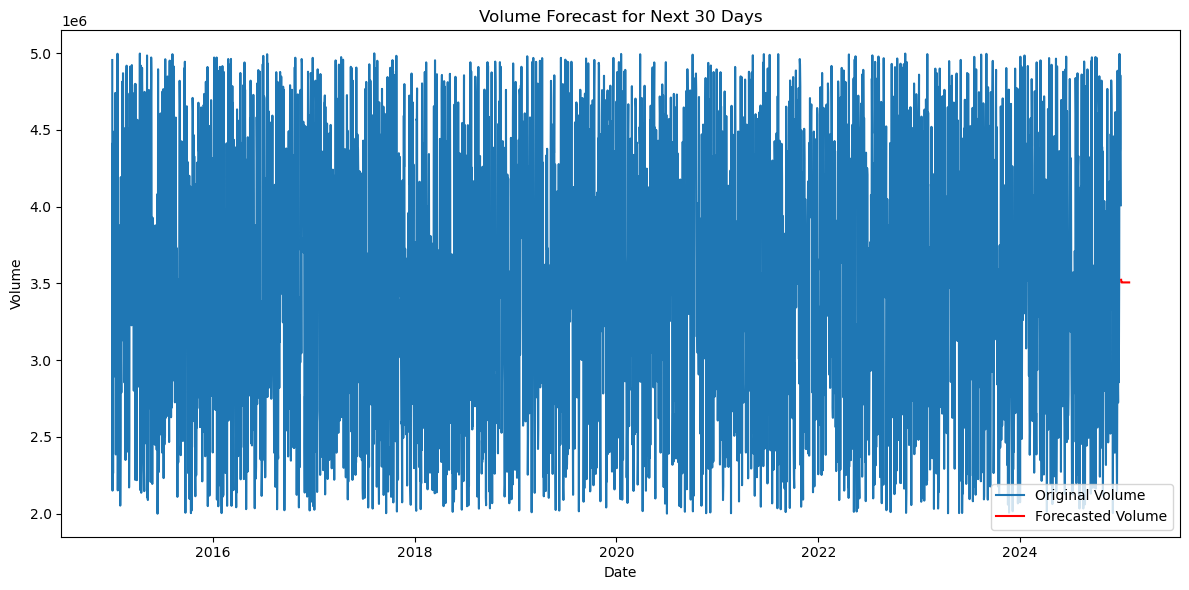

In [33]:
# Plot original Volume vs Forecast

plt.figure(figsize=(12, 6))
plt.plot(data["Volume"], label="Original Volume")
plt.plot(forecast_df["Forecasted_Volume"], label="Forecasted Volume", color='red')
plt.title("Volume Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
# Evaluate using Mean Absolute Error (MAE)

in_sample_pred = model_vol_fit.predict()
mae = mean_absolute_error(data["Volume"], in_sample_pred)
print("Mean Absolute Error (MAE) on in-sample Volume:", mae)

Mean Absolute Error (MAE) on in-sample Volume: 750701.305494708
